# Bangkok AirBnb Analysis

The goal for this project is to analyse data to understand what kinds of listings are likely to attract more occupants.

Data sourced from: https://insideairbnb.com

# Data Cleaning

In [172]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('/Users/joeytan/Documents/Data Analyst/Portfolio/PortfolioProject1_Airbnb/Datasets/listings.csv')
df2 = pd.read_csv('/Users/joeytan/Documents/Data Analyst/Portfolio/PortfolioProject1_Airbnb/Datasets/calendar.csv')

/var/folders/27/hj1bvt014t3_6yjh05291ys80000gn/T/ipykernel_33373/4149153320.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/Users/joeytan/Documents/Data Analyst/Portfolio/PortfolioProject1_Airbnb/Datasets/calendar.csv')


Investigating what is wrong with the import.

In [174]:
df2.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,27934,2024-12-26,t,$55.00,NaN,30.0,240.0
1,27934,2024-12-27,f,$55.00,NaN,30.0,240.0
2,27934,2024-12-28,f,$55.00,NaN,30.0,240.0
3,27934,2024-12-29,f,$55.00,NaN,30.0,240.0
4,27934,2024-12-30,t,$55.00,NaN,30.0,240.0


In [175]:
df2[(df2['adjusted_price'].notna())].head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
5088673,917282470605681869,2024-12-26,f,"$190,000.00","$190,000.00",2.0,30.0
5088967,917282470605681869,2024-12-27,f,"$190,000.00","$190,000.00",2.0,30.0
5088968,917282470605681869,2024-12-28,t,"$190,000.00","$190,000.00",2.0,30.0
5088969,917282470605681869,2024-12-29,t,"$190,000.00","$190,000.00",2.0,30.0
5088970,917282470605681869,2024-12-30,t,"$190,000.00","$190,000.00",2.0,30.0


Here we can see that columns 3 and 4 have a currency format

In [177]:
df2['price'].info()
df2['adjusted_price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9347241 entries, 0 to 9347240
Series name: price
Non-Null Count    Dtype 
--------------    ----- 
9347241 non-null  object
dtypes: object(1)
memory usage: 71.3+ MB
<class 'pandas.core.series.Series'>
RangeIndex: 9347241 entries, 0 to 9347240
Series name: adjusted_price
Non-Null Count  Dtype 
--------------  ----- 
365 non-null    object
dtypes: object(1)
memory usage: 71.3+ MB


In [178]:
df2['price']=df2['price'].str.strip('$')
df2['price']=df2['price'].str.replace(',','')
df2['price']=df2['price'].astype(float)
df2['adjusted_price']=df2['adjusted_price'].str.strip('$')
df2['adjusted_price']=df2['adjusted_price'].str.replace(',','')
df2['adjusted_price']=df2['adjusted_price'].astype(float)

## Removing Duplicates

In [180]:
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()

In [181]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25609 entries, 0 to 25608
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25609 non-null  int64  
 1   listing_url                                   25609 non-null  object 
 2   scrape_id                                     25609 non-null  int64  
 3   last_scraped                                  25609 non-null  object 
 4   source                                        25609 non-null  object 
 5   name                                          25609 non-null  object 
 6   description                                   24823 non-null  object 
 7   neighborhood_overview                         9756 non-null   object 
 8   picture_url                                   25609 non-null  object 
 9   host_id                                       25609 non-null 

The 'price' column in df1 also has a currency format

In [183]:
df1['price']=df1['price'].str.strip('$')
df1['price']=df1['price'].str.replace(',','')
df1['price']=df1['price'].astype(float)

## Removing sparse data

In [185]:
df1 = df1.drop(df1.columns[[7,21,27,29,49,68]], axis=1)
df2 = df2.drop(df2.columns[4], axis=1)

In [186]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25609 entries, 0 to 25608
Data columns (total 69 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25609 non-null  int64  
 1   listing_url                                   25609 non-null  object 
 2   scrape_id                                     25609 non-null  int64  
 3   last_scraped                                  25609 non-null  object 
 4   source                                        25609 non-null  object 
 5   name                                          25609 non-null  object 
 6   description                                   24823 non-null  object 
 7   picture_url                                   25609 non-null  object 
 8   host_id                                       25609 non-null  int64  
 9   host_url                                      25609 non-null 

## Removing data that are not irrelevant by 'logic'

In [188]:
df1 = df1.drop(df1.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,18,19,20,21,22,32,35,45,50,52,53,54,55,64,65,66,67,68]], axis=1)

## Using correlation map to find dimensions that are correlated to targets: price & review score

In [190]:
df1.corr(numeric_only = True)

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
id,1.000000,-0.028453,0.061936,0.018708,-0.009354,-0.015377,-0.043001,-0.000926,-0.088807,-0.191573,...,0.276998,0.245638,-0.268833,0.010818,-0.005615,0.000215,-0.028582,-0.014841,0.059010,-0.001680
latitude,-0.028453,1.000000,0.028028,0.015731,0.008172,0.019422,0.020526,-0.014255,-0.019841,0.001266,...,0.034882,0.013482,-0.019030,-0.005127,-0.008833,0.000117,-0.017940,-0.009749,-0.031280,0.001787
longitude,0.061936,0.028028,1.000000,0.008294,0.027476,0.030972,-0.020956,-0.002146,0.000989,-0.015328,...,0.022482,-0.010567,-0.041403,-0.012148,-0.011890,-0.014376,-0.007627,-0.015980,-0.039608,-0.010900
accommodates,0.018708,0.015731,0.008294,1.000000,0.641026,0.528079,0.705724,0.147661,-0.047296,0.020043,...,0.032238,0.024050,0.080542,0.021123,0.007815,0.012175,0.026644,0.025334,0.002331,0.020126
bathrooms,-0.009354,0.008172,0.027476,0.641026,1.000000,0.609948,0.559081,0.114911,-0.047863,0.023058,...,0.035964,0.027107,0.009986,-0.000011,0.001703,-0.020170,0.019611,0.010949,-0.014813,0.006605
bedrooms,-0.015377,0.019422,0.030972,0.528079,0.609948,1.000000,0.594367,0.125793,-0.020230,0.005676,...,-0.024718,-0.024483,-0.003810,0.005485,-0.001858,0.003111,0.011993,0.005684,-0.006980,-0.004215
beds,-0.043001,0.020526,-0.020956,0.705724,0.559081,0.594367,1.000000,0.106977,-0.070544,0.030223,...,0.029779,0.025656,0.042652,0.012347,0.002987,0.004119,0.016745,0.014349,0.000639,0.015795
price,-0.000926,-0.014255,-0.002146,0.147661,0.114911,0.125793,0.106977,1.000000,-0.004183,0.006854,...,0.045096,0.024828,-0.009533,-0.027290,-0.032994,-0.021514,-0.024032,-0.023347,-0.008335,-0.028018
minimum_nights,-0.088807,-0.019841,0.000989,-0.047296,-0.047863,-0.020230,-0.070544,-0.004183,1.000000,0.042842,...,-0.031958,-0.034471,-0.053434,0.022765,0.015658,0.020576,0.011810,0.018216,0.015785,0.006012
maximum_nights,-0.191573,0.001266,-0.015328,0.020043,0.023058,0.005676,0.030223,0.006854,0.042842,1.000000,...,-0.056477,-0.029061,0.048219,-0.009838,-0.000391,-0.004736,0.001287,0.000661,-0.007680,-0.006100


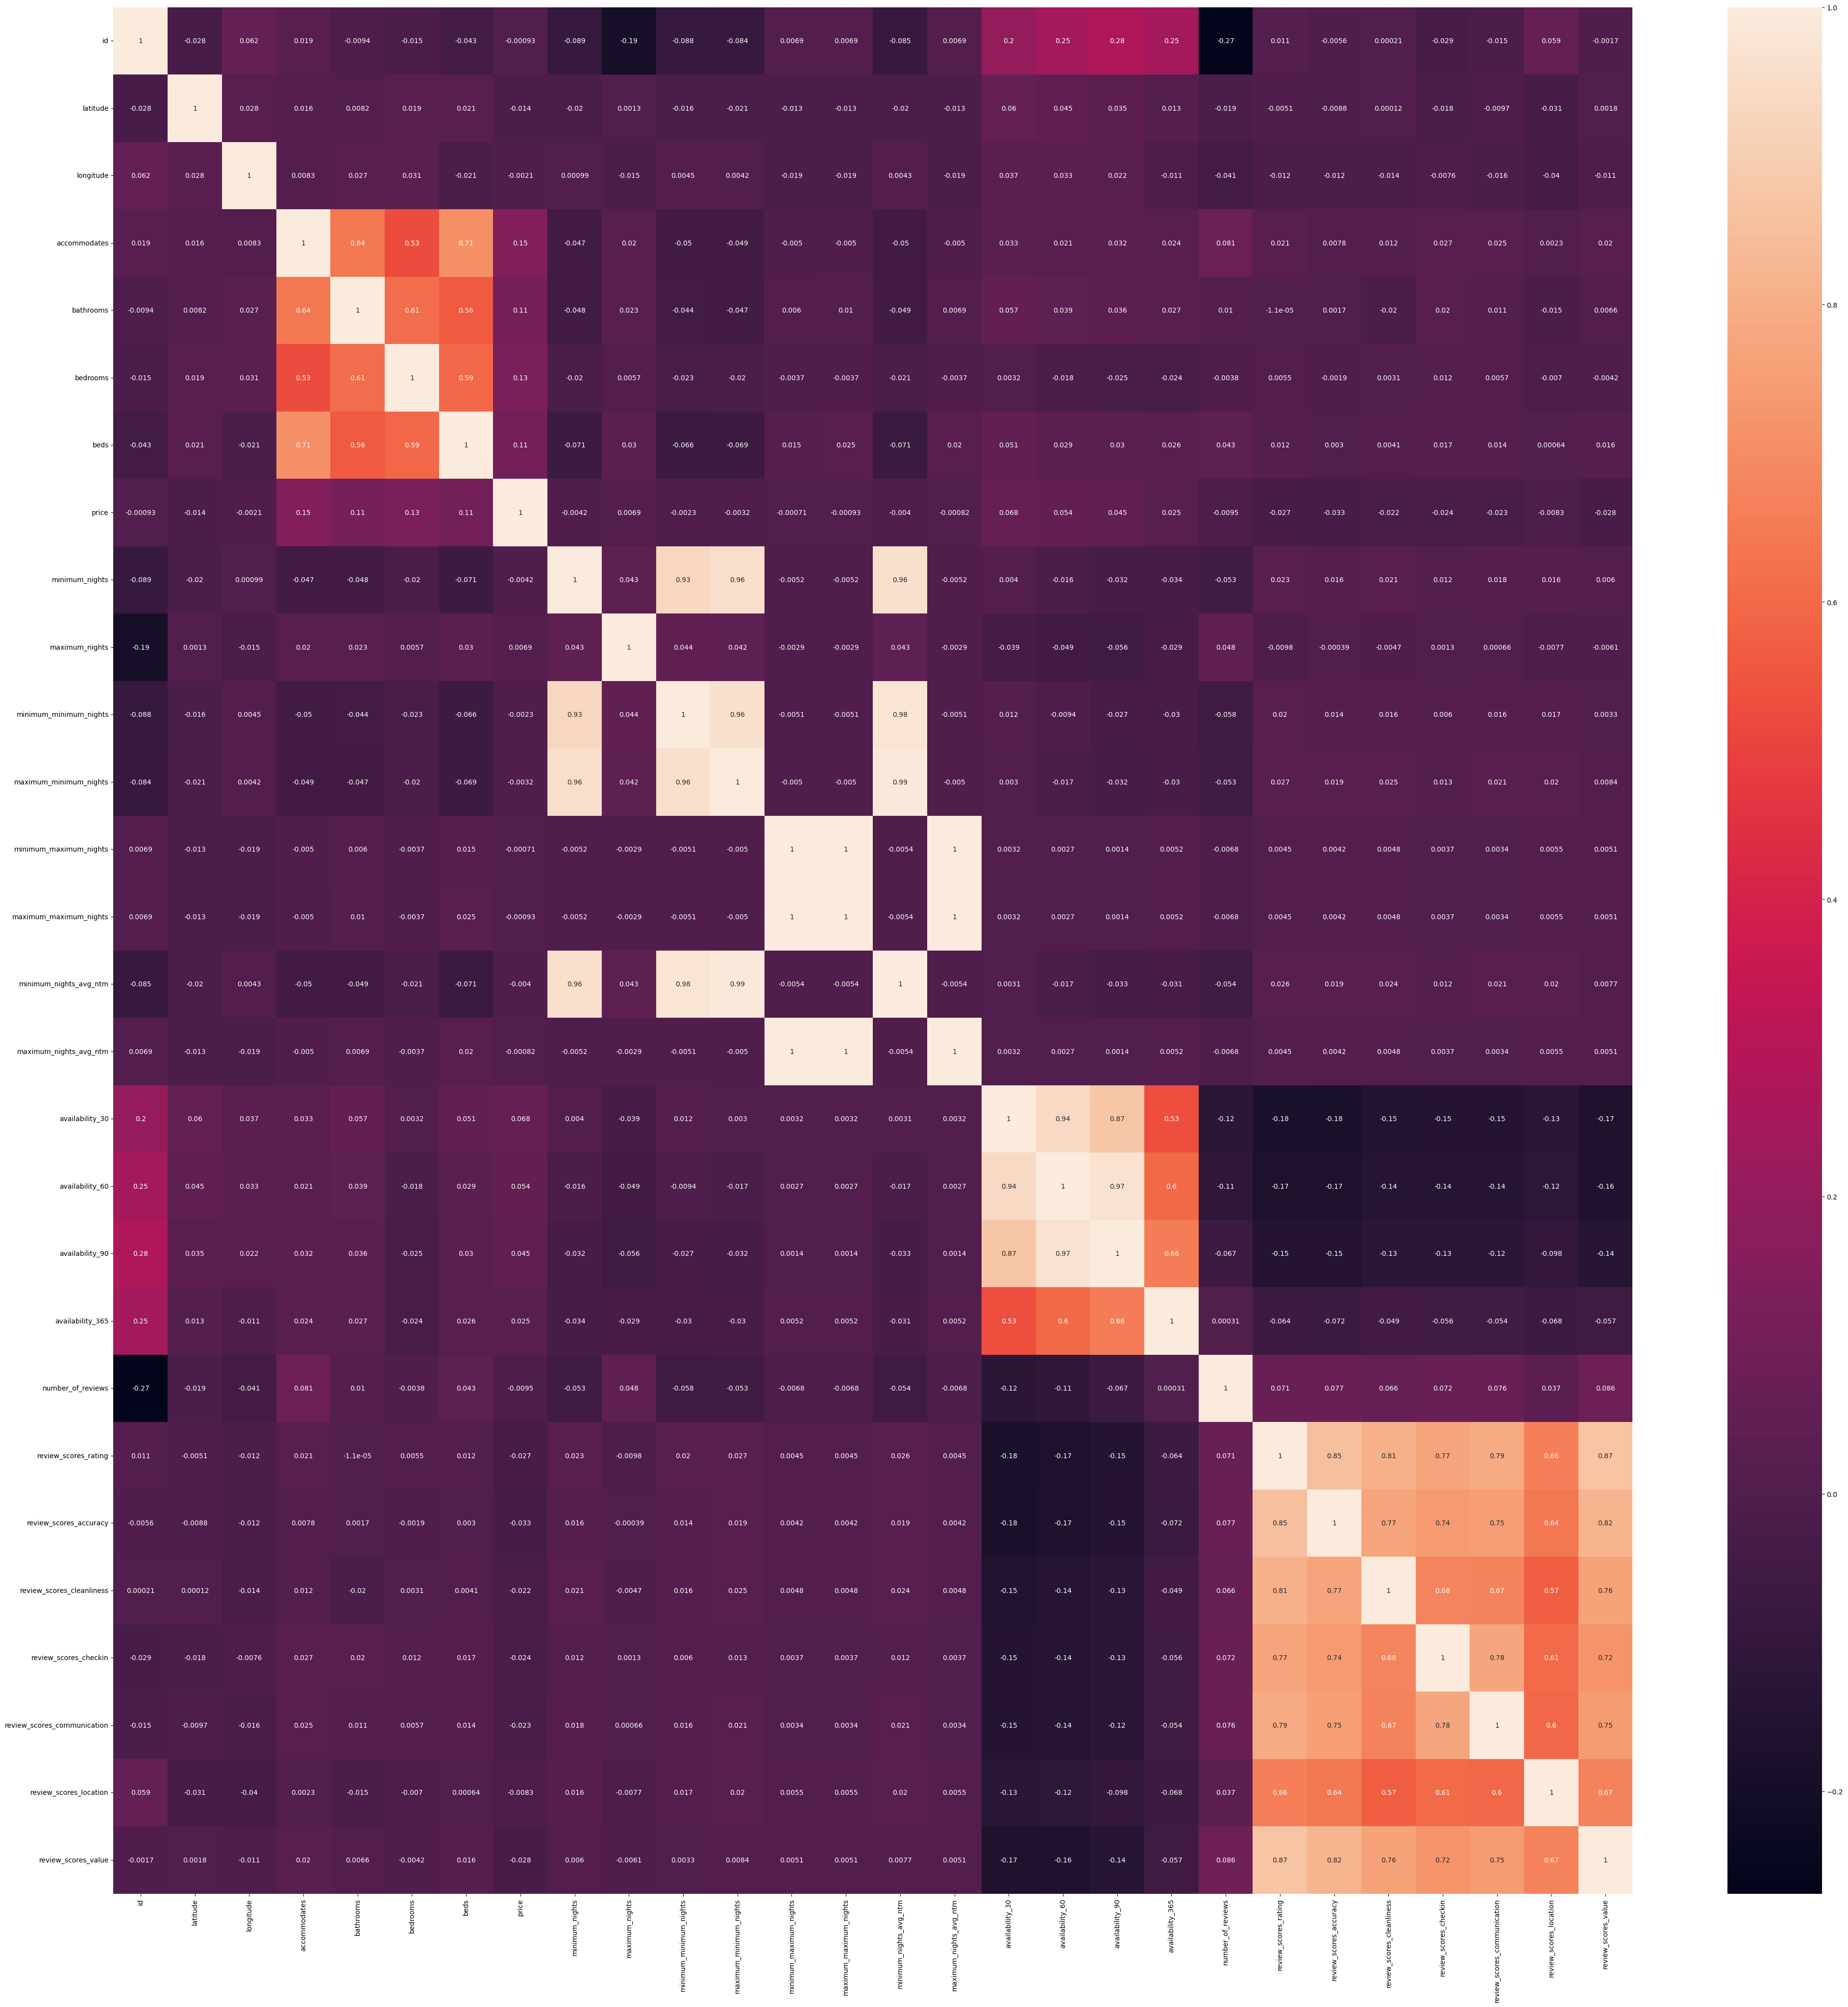

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df1.corr(numeric_only = True),annot=True)

plt.rcParams['figure.figsize']= (50,50)
plt.show()

Price did not seem to be correlated to any dimensions, investigating

In [193]:
df1['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25609 entries, 0 to 25608
Series name: price
Non-Null Count  Dtype  
--------------  -----  
20480 non-null  float64
dtypes: float64(1)
memory usage: 200.2 KB


## Removing null values

In [195]:
df1 = df1.dropna(subset=['price'])
df1[(df1['price'].isna()==True)]

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable


In [196]:
df1['price'].describe()

count      20480.000000
mean        3462.128320
std        17205.085445
min           69.000000
25%         1100.000000
50%         1800.000000
75%         3124.500000
max      1000000.000000
Name: price, dtype: float64

Spotted an outlier in the dataset, the 75% is only 3,124 while the max percentile is 1,000,000, this will skew the data

## Finding outliers

<Axes: >

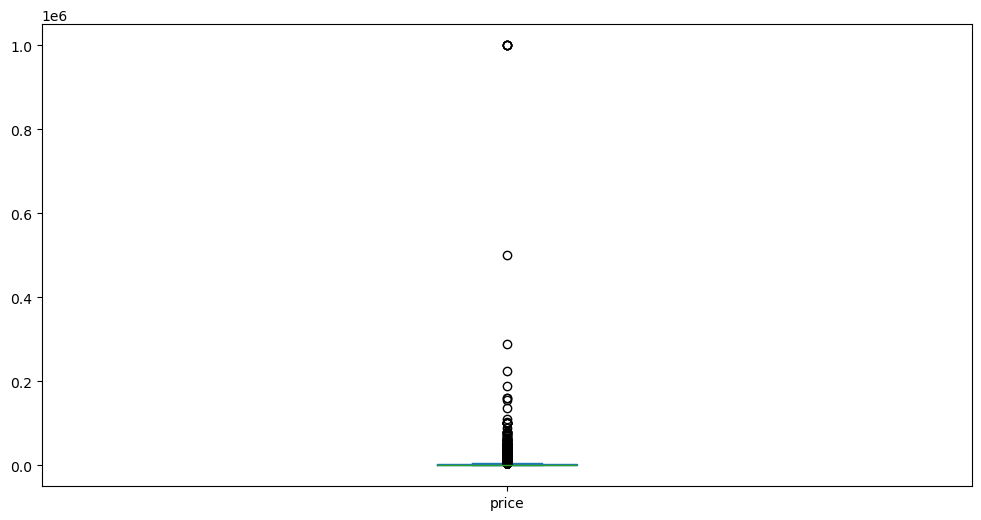

In [199]:
df1['price'].plot.box(figsize=(12,6))

## Removing outliers

<Axes: >

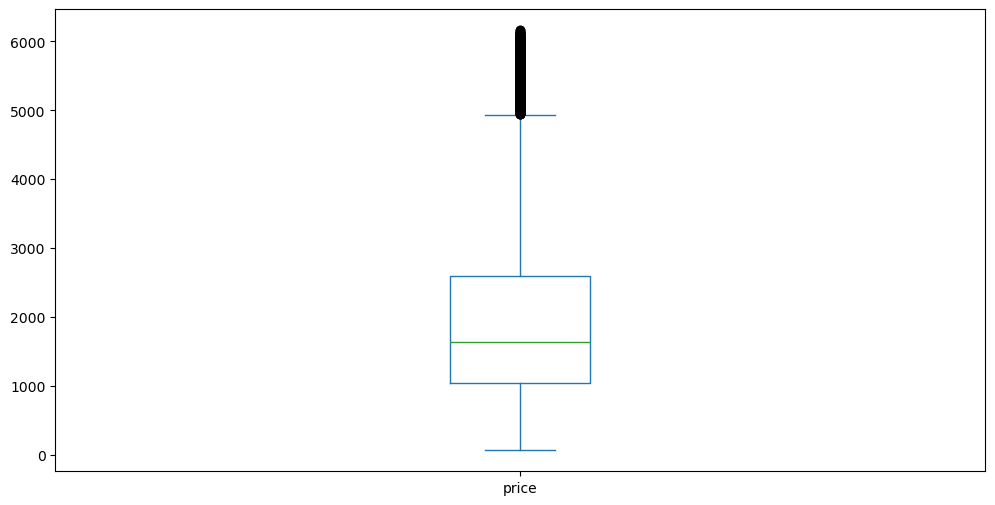

In [201]:
Q1 = df1['price'].quantile(0.25)
Q3 = df1['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_array = np.where(df1['price'] >= upper)[0]
lower_array = np.where(df1['price'] <= lower)[0]

indices_to_drop = np.concatenate([upper_array, lower_array])
df1.drop(index=df1.index[indices_to_drop], inplace=True)

df1['price'].plot.box(figsize=(12,6))

The data is much better represented now, checking correlation again

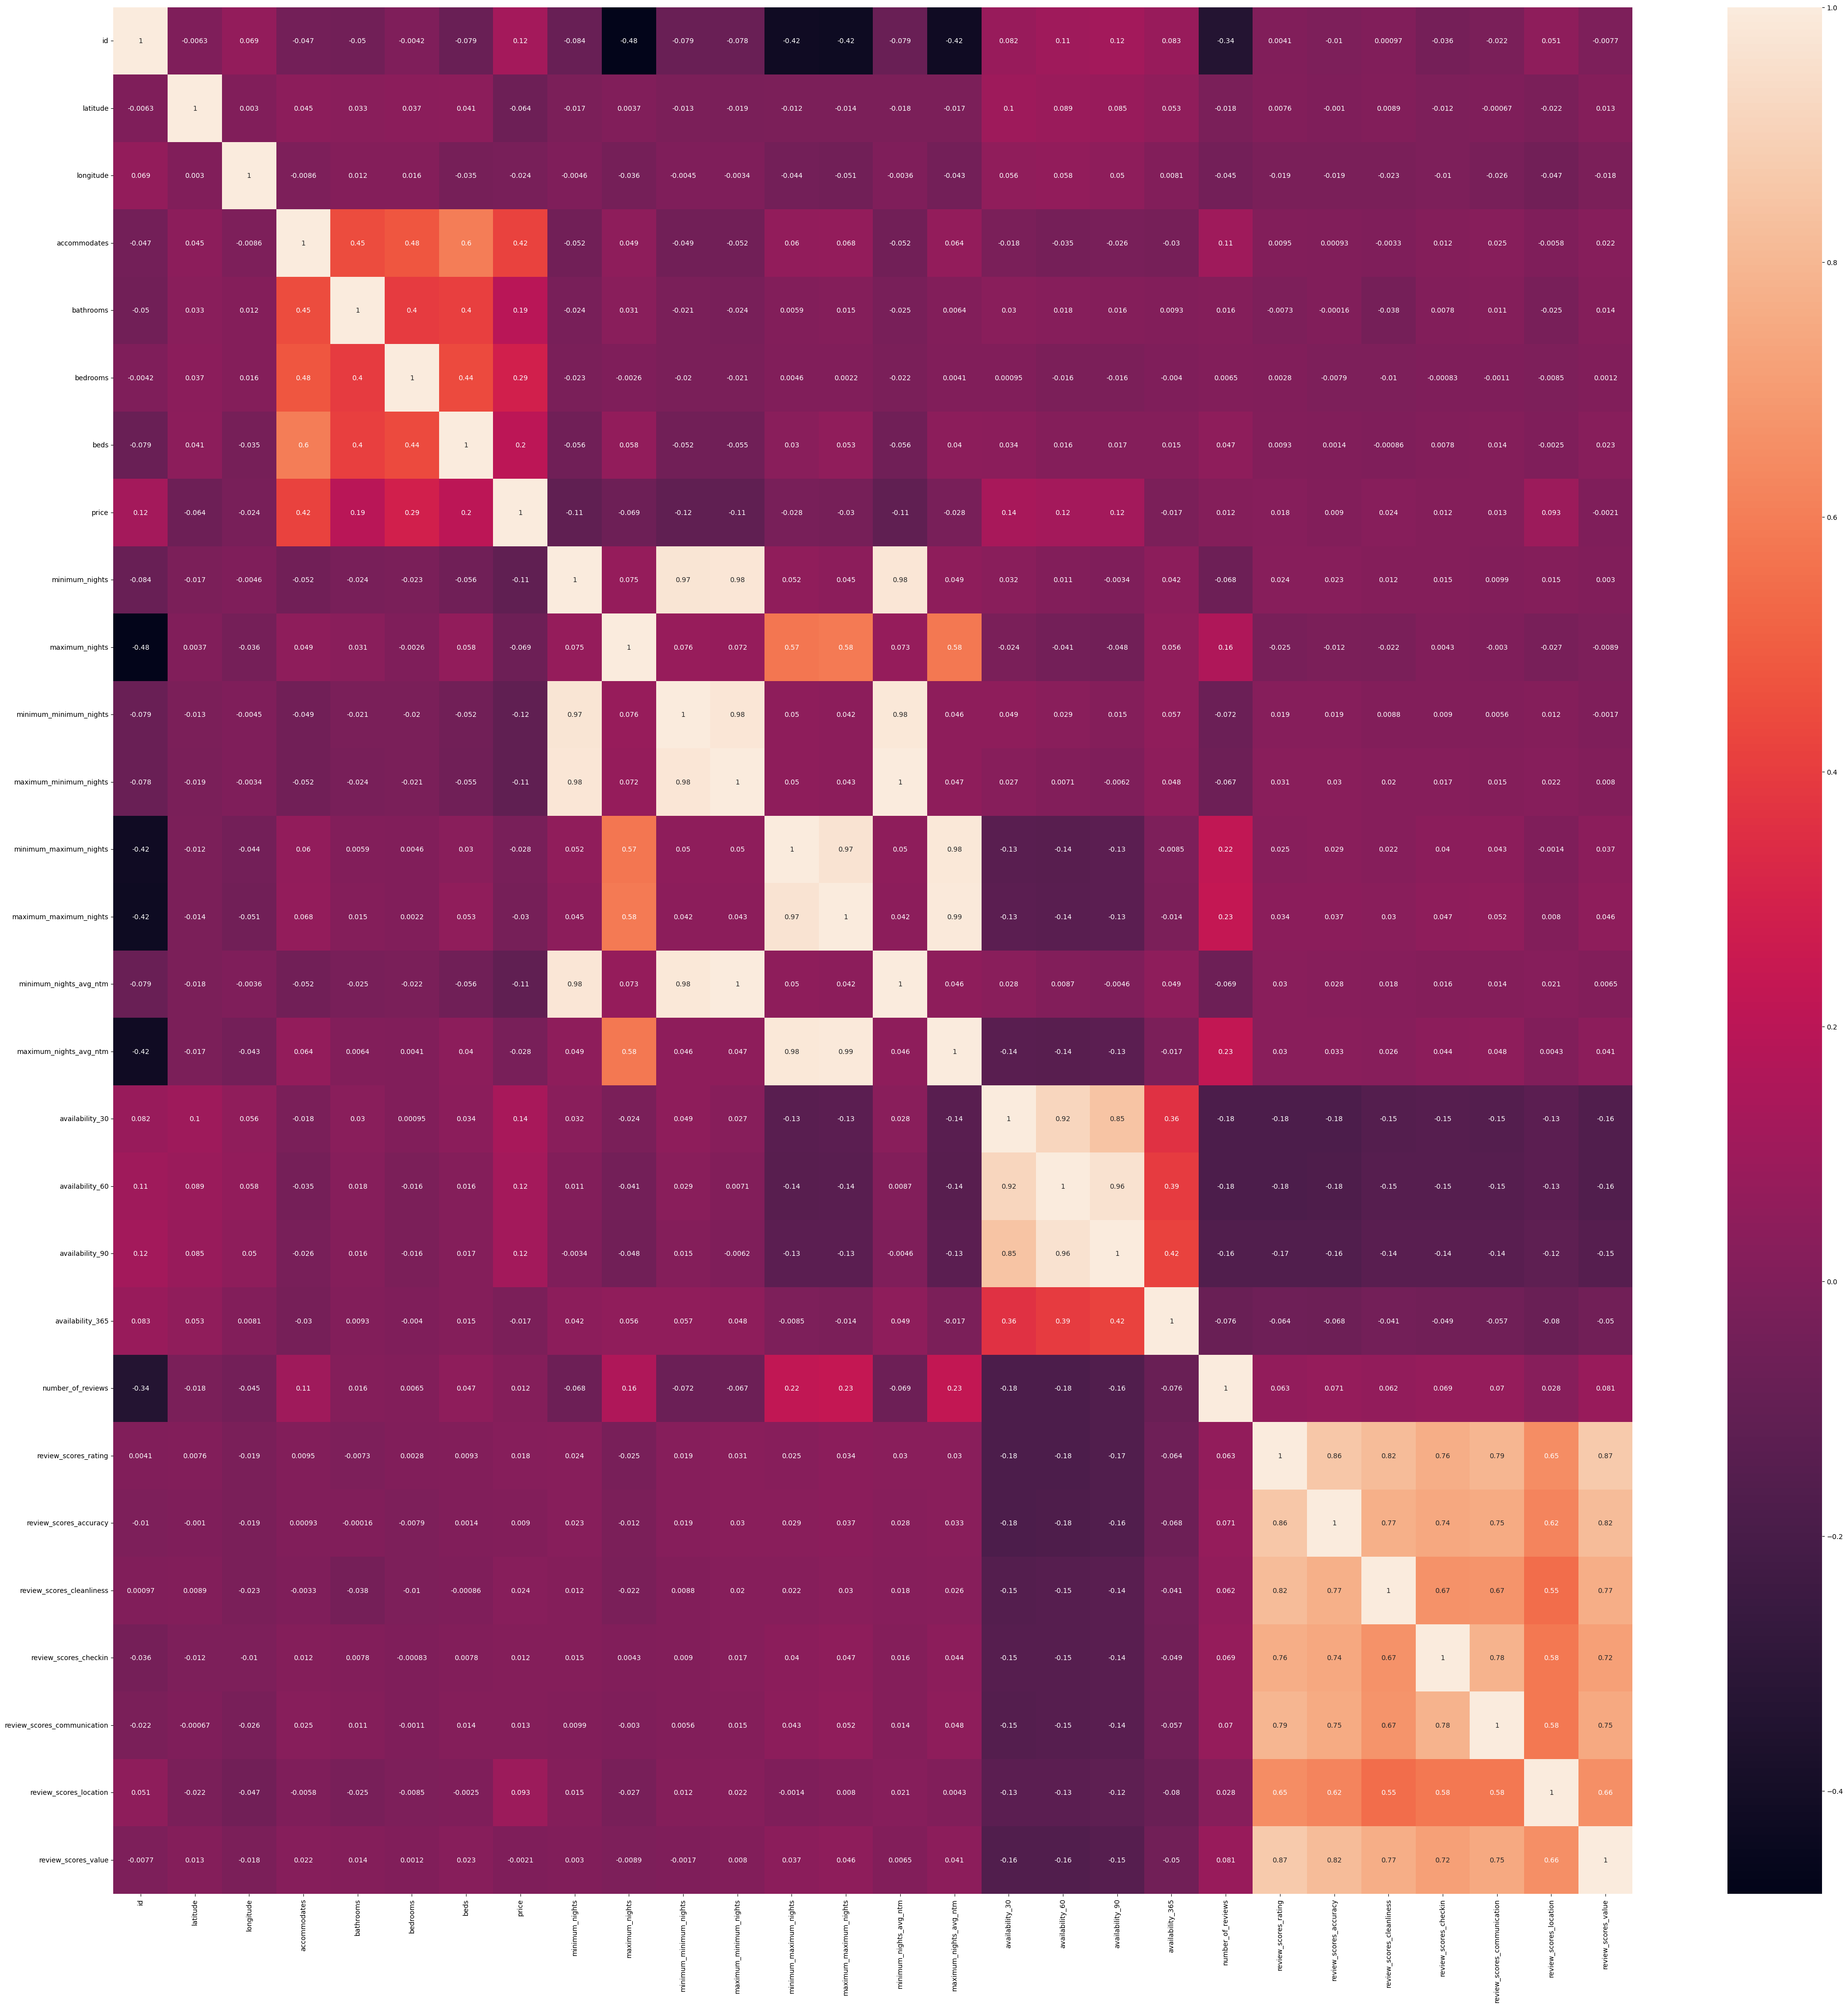

In [203]:
sns.heatmap(df1.corr(numeric_only = True),annot=True)

plt.rcParams['figure.figsize']= (50,50)
plt.show()

It seems only the capacity ('accommodates') is moderately corredlated to the price.\
The number of bedrooms and bathrooms are correlated to the price but only slightly.\
I'm surprised that the review score rating does not seem to be correlated to the price.\
However, I'm going to keep the review score dimensions as the correlation map only shows numeric dimensions and the review scores may be correlated to non-numeric factors. I'm also going to keep the 'availibity_365' dimensions as they will be used to calculate annual occupancy rate.

In [205]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18580 entries, 1 to 25608
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18580 non-null  int64  
 1   host_response_time           17487 non-null  object 
 2   host_response_rate           17487 non-null  object 
 3   host_acceptance_rate         17321 non-null  object 
 4   host_is_superhost            17497 non-null  object 
 5   host_has_profile_pic         18580 non-null  object 
 6   host_identity_verified       18580 non-null  object 
 7   neighbourhood_cleansed       18580 non-null  object 
 8   latitude                     18580 non-null  float64
 9   longitude                    18580 non-null  float64
 10  property_type                18580 non-null  object 
 11  room_type                    18580 non-null  object 
 12  accommodates                 18580 non-null  int64  
 13  bathrooms            

## Removing numeric dimensions that are not corelated to target: price & review score

In [207]:
df1 = df1.drop(df1.columns[[17,18,19,20,21,22,23,24,25,26,27]], axis=1)

## Removing outliers from calendar dataset

In [209]:
df2.describe().round()

,listing_id,price,minimum_nights,maximum_nights
count,9.347241e+06,9347241.0,9347233.0,9.347233e+06
mean,6.533508e+17,4389.0,14.0,6.715300e+05
std,5.290997e+17,54449.0,43.0,3.795000e+07
min,2.793400e+04,0.0,1.0,1.000000e+00
25%,3.521103e+07,950.0,1.0,3.650000e+02
50%,8.519271e+17,1500.0,2.0,3.650000e+02
75%,1.135911e+18,2500.0,14.0,1.125000e+03
max,1.318986e+18,3260739.0,1115.0,2.147484e+09


<Axes: >

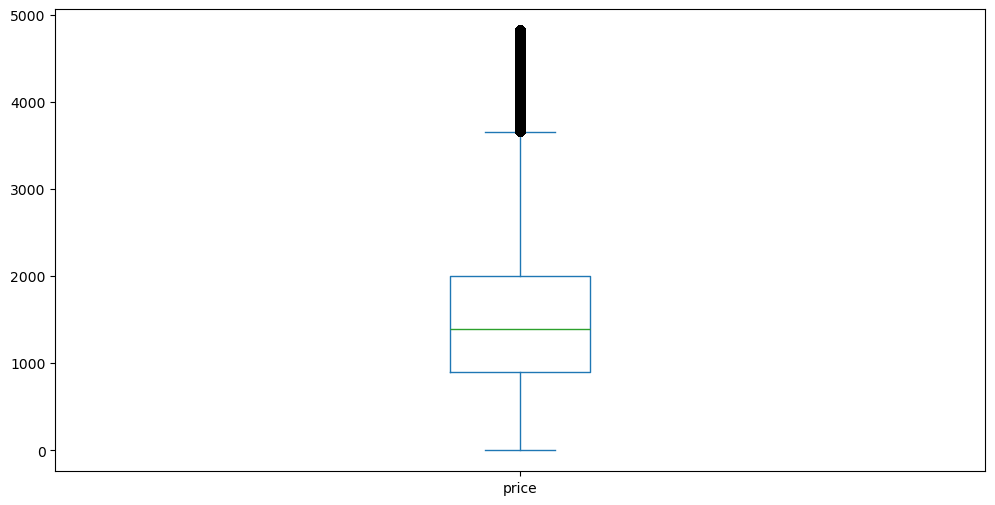

In [210]:
Q1 = df2['price'].quantile(0.25)
Q3 = df2['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_array = np.where(df2['price'] >= upper)[0]
lower_array = np.where(df2['price'] <= lower)[0]

indices_to_drop = np.concatenate([upper_array, lower_array])
df2.drop(index=df2.index[indices_to_drop], inplace=True)

df2['price'].plot.box(figsize=(12,6))

<Axes: >

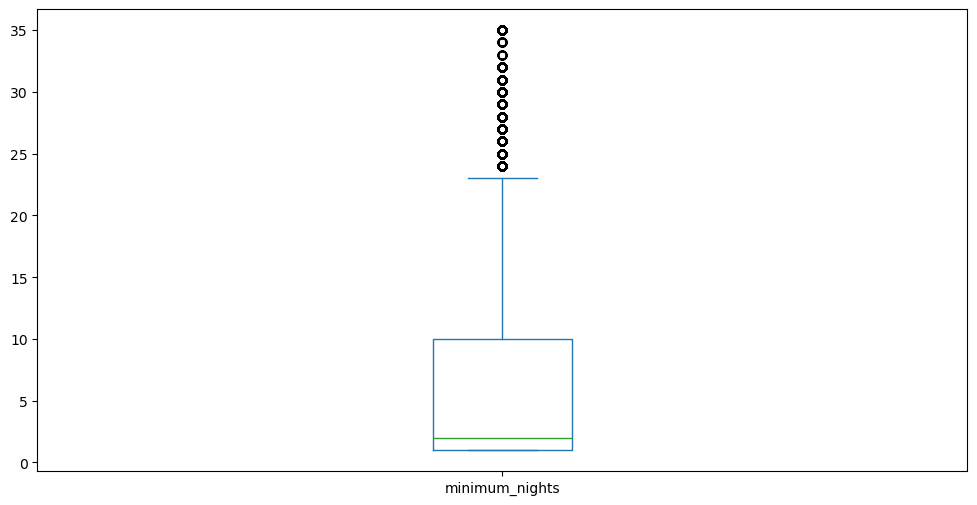

In [211]:
Q1 = df2['minimum_nights'].quantile(0.25)
Q3 = df2['minimum_nights'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_array = np.where(df2['minimum_nights'] >= upper)[0]
lower_array = np.where(df2['minimum_nights'] <= lower)[0]

indices_to_drop = np.concatenate([upper_array, lower_array])
df2.drop(index=df2.index[indices_to_drop], inplace=True)

df2['minimum_nights'].plot.box(figsize=(12,6))

<Axes: >

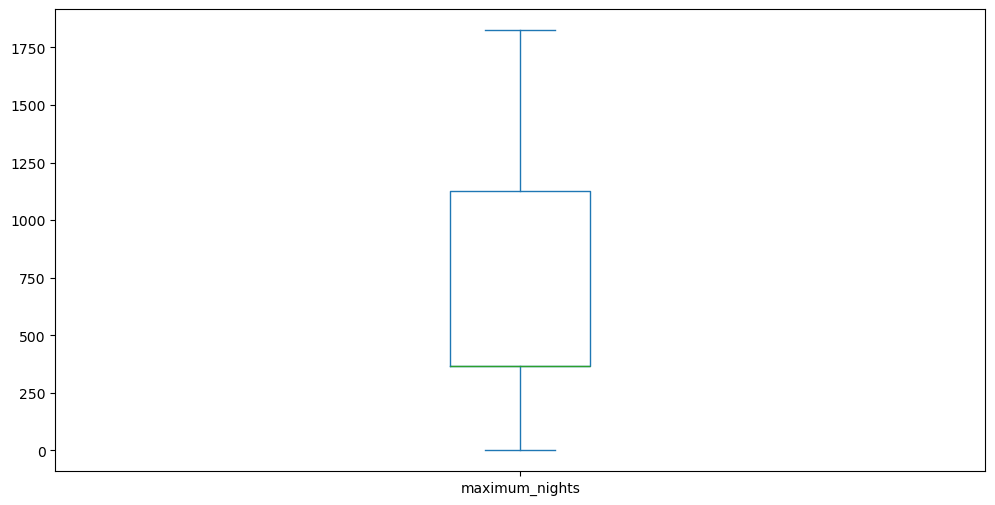

In [212]:
Q1 = df2['maximum_nights'].quantile(0.25)
Q3 = df2['maximum_nights'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_array = np.where(df2['maximum_nights'] >= upper)[0]
lower_array = np.where(df2['maximum_nights'] <= lower)[0]

indices_to_drop = np.concatenate([upper_array, lower_array])
df2.drop(index=df2.index[indices_to_drop], inplace=True)

df2['maximum_nights'].plot.box(figsize=(12,6))

## Merging the 2 datasets on the listing IDs that are remaining after removing outliers

In [214]:
df3= df1.merge(df2, left_on='id', right_on='listing_id', how='inner')
df1 = df3[df3.columns[0:27]].rename(columns={'price_x':'price'}).drop_duplicates()
df2 = df3[df3.columns[27:]].rename(columns={'price_y':'price'})
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17463 entries, 0 to 6353106
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           17463 non-null  int64  
 1   host_response_time           16614 non-null  object 
 2   host_response_rate           16614 non-null  object 
 3   host_acceptance_rate         16466 non-null  object 
 4   host_is_superhost            16400 non-null  object 
 5   host_has_profile_pic         17463 non-null  object 
 6   host_identity_verified       17463 non-null  object 
 7   neighbourhood_cleansed       17463 non-null  object 
 8   latitude                     17463 non-null  float64
 9   longitude                    17463 non-null  float64
 10  property_type                17463 non-null  object 
 11  room_type                    17463 non-null  object 
 12  accommodates                 17463 non-null  int64  
 13  bathrooms          

## Exporting cleaned data for EDA

In [216]:
df1.to_csv('/Users/joeytan/Documents/Data Analyst/Portfolio/PortfolioProject1_Airbnb/Datasets/Cleaned Data/listings_cleaned.csv', index=False)
df2.to_csv('/Users/joeytan/Documents/Data Analyst/Portfolio/PortfolioProject1_Airbnb/Datasets/Cleaned Data/calendar_cleaned.csv', index=False)